# Import of the main functions

In [1]:
import numpy as np
import copy
from gmpy2 import mpfr, get_context
get_context().precision=400


# Import of functions for creation of GP from the data, 
# separate training
#thhermodynamic consts
from GPPhad import create_from_scratch, retrain, consts

# Import of covariance functions, 
#class for GP, 
#printing function
# function for trained GP loading
from GPPhad import cov_real, GP_full, print_point, load

# Hyperarameters of Gaussian Process regression

In [2]:
th_full = [mpfr('-6.247035679999999757683326606638729572296142578125',400),
 mpfr('0.292807738541853712632700990070588886737823486328125',400),
 mpfr('0.456572889549176519352613468072377145290374755859375',400),
 mpfr('-0.04191095261276779615489118668847368098795413970947265625',400),
 mpfr('0.05475806710280016476044551154700457118451595306396484375',400),
 mpfr('0.10669002480846336011754971195841790176928043365478515625',400),
 mpfr('-5.05760411554052335958431285689584910869598388671875',400),
 mpfr('-0.88172228690680132245915956445969641208648681640625',400),
 mpfr('0.0298605271304240964258536195075066643767058849334716796875',400),
 mpfr('-0.007369150920216244009253170332840454648248851299285888671875',400),
 mpfr('11.3855892321983223069992163800634443759918212890625',400),
 mpfr('-3.817151634735199028369834195473231375217437744140625',400),
 mpfr('0.27150991454327677576685573512804694473743438720703125',400),
 mpfr('0.56436708068229746171340366345248185098171234130859375',400),
 mpfr('-0.06247883283127071696316789939373848028481006622314453125',400),
 mpfr('-0.035707238514284513064556136896499083377420902252197265625',400),
 mpfr('-1.2659861741798399403791108852601610124111175537109375',400)]

# Fixed parameters

- phases of interest
- parameters of MD simulation

In [3]:
phases = ['liq', 'sol_fcc', 'sol_bcc']
x_fixed = [5, 10**30]

# Construction of the GP from MD data 

In [4]:
GP_Li = create_from_scratch(cov_real, th_full, phases, x_fixed = x_fixed)

In [5]:
# Check of marginal likelyhood
GP_Li.marg_like(th_full, recomp = False)

-271.86193129098933306404881612101433514294201961785481024444605575699969248238247385433031025310809157326631534722126117127


-271.8619312909893324

In [6]:
# Getting T-P of the training set
def get_T_P(GP_Li):
    res = {}
    for el in ['liq', 'sol_bcc', 'sol_fcc']:
        X = np.array(GP_Li.X)[np.array(GP_Li.X)[:, 0] == el][::2]
        res[el] = np.zeros((len(X), 2))
        for i, x in enumerate(X):
            res[el][i, 1] = float(x[2])/consts['k']
            res[el][i, 0] = float(GP_Li.predict_P(t = x[2], v = x[3], phase = 'liq')[0]*consts['Pk'])
    return res

T_P_phase_diag = get_T_P(GP_Li)

# Training per phase and addition of melt points

In [7]:
# Bounds for phases volumes
GP_Li.bounds = {"liq": [10, 24], "sol_fcc": [10, 15], 'sol_bcc': [10, 24]}

# Melting points with error
melt_points = [[['sol_fcc', 'liq'], [12/consts['Pk'], 495.5*consts['k'], 1.6*consts['k']]],
                [['sol_bcc', 'liq'], [0/consts['Pk'], 475.7*consts['k'], 1.7*consts['k']]]]

# Index of hyperparameters that correspond to phases
ind_bounds = {'liq': range(0, 6), 'sol_fcc': range(6, 11), 'sol_bcc': range(11, 17)}

# Separate train of phases
GP_Li, th_temp = retrain(GP_Li, melt_points, ind_bounds)

-49.739109898843443002848578611403128248618885932198036581918669815961316818849422009086864031843148321248087810885951021438
-49.739109898843443002848578611403128248618885932198036581918669815961316818849422009086864031843148321248087810885951021438
-49.739109898843434005644759983477970162633234266687461408949100918345370538490488404470575148738784002943653872772209696497
-49.739109898843401727448602579607043757987115340401023621725541183115902030582273187438983621211821797496992386663688534629
-49.739109898842972039440582905661311764034266353834965341001479526177213761948797400416415179532776766256762861829766519129
-49.739109898843640986111512909626764558186550348986806027937421408231630758652621315270707197946969931944559173531993270425
-49.739109898843356117884465271636940505970867299837092608060320998662846313190577526629059439725864545452307289321216027849
86345.070055423060773086766983257652278987260077567853899295319649547040163783336457389979623751196372528436402540756408151
8

899782.5788495322207583044213450073969581271475402685328343304569913882775973365858479182516680246289643244434640715856273
899782.58255456759755005793394837969645512613635316427273236315750472821532250816166452054374349140132555370670846560536643
-161.38085296661784800015863001246798736762163290349789484484860966258157377626387930950962188529557488421430562401344137215
-161.38085296661784800015863001246798736762163290349789484484860966258157377626387930950962188529557488421430562401344137215
-161.38085296661787120821529009726670212383260429026582104504378394349369137609599039651405558224704172046989086155303250296
-161.38085296661985822991685205668157559863609704470319070312045468454308056185588776640153548750574392247105088724095676917
-161.38085296663507993029367792450688416014802532595447116495829182225409963294740624816220924954502700389128995261974337202
-161.38085296661783181356425039309392507928809947119656631039622525750899267107249373694043153635213715912071587352498257481
-16

-60.741968425512718001598278131891631552861074126593701760022101705478530979606780879486126521400361342770953417947355789917
-60.741968425512664855358125592327545493151335905101540286085671627494362935782458621511773812819083090228976543094668838163
-60.741968425513100164590401207116985016681644693749997815186203527865628571334627945940464661342761328501514985768207497482
-60.741968425510878498197204684779266597895007638575866518562616651892399686339227378934989194030537990700732963552417375878
-60.741968425512665872969232361839309059654648561035949610096195077786551728633168011843851461518824324066384527157578747561
-60.741968425512926121375222481218725870056451023541037649228439393936122553778137638211519950667772620096617142894414019821
-60.741968425512926121375222481218725870056451023541037649228439393936122553778137638211519950667772620096617142894414019821
-60.741968425512985222197287666891654451782257155562280663339989781374071532673403815815075650651785112127091472323810766662


In [43]:
list(range(11, 17))

[11, 12, 13, 14, 15, 16]

In [8]:
# Check of marginal likelyhood
GP_Li.marg_like(GP_Li.th, recomp = False)

-297.45580217856040949727223398325647391175521422232759329104469050653510999812889416445992681247338001855249932808651687421


-297.45580217856041827

# Triple point calculation

In [9]:
opt = 'triple'  # Option for calculation
k = consts['k'] # Boltzman const

# Loking in the interval of volumes v0 +- dv
dx = 3
x = [14.289, 14.383, 14.281, 500.380] # initial guess

# Bounds on phase diagrams we are looking in
# 1st phase volume, 2nd phase volume, 3rd phase volume, temperature
bounds = [[x[0]-2, x[0]+2], [x[1]-dx, x[1]+dx], [x[2] - dx, x[2]+dx], [(x[3] - dx*20)*k, (x[3] + dx*20)*k]]

# Phases that coexist (3 in this case)
phases = ['sol_fcc', 'liq', 'sol_bcc']


y, y_var, V = GP_Li.compute_var(opt, phases, bounds = bounds,  full = True)

[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416359  0.48885202  0.07807863 -1.12752781]
[-0.03416372  0.48885393  0.07807865 -1.12752805]
[-0.03416371  0.48885369  0.07807861 -1.12752755]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[ 0.33861242 -4.65173996 -0.03866324  0.4564566 ]
[ 0.01347383 -0.21758184  0.00099019 -0.00181155]
[ 0.049506   -0.7169622   0.00498752 -0.07307216]
[-0.00266817 -0.00432539  0.0065273  -0.06317506]
[-0.01536259  0.2278368   0.0060835  -0.0996927 ]
[-0.00458277  0.05312394  0.00108668 -0.01136396]
[-0.00378795  0.04372095 -0.0029527   0.04627196]
[-0.0027436   0.03584232 -0.00047285  0.00318514]
[ 0.0001247  -0.0046335  -0.00281784  0.037296  ]
[-0.0009789   0.01258793 -0.0011268   0.01112659]
[ 0.00090213 -0.02010331 -0.00097694  0.01507948]
[-0.00039114 -0.0018848  -0.00028167  0.00494254]
[ 0.00020528 -0.01039952  0.00139532 -0.01838501]


In [10]:
point, point_var = print_point(opt, phases, y, y_var)

sol_fcc volume: 14.48667 ± 0.09623
liq volume: 14.51612 ± 0.10938
sol_bcc volume: 14.60743 ± 0.10591
triple point temp: 500.18509 ± 1.51384


In [11]:
GP_Li.predict_P(point[-1]*consts['k'], point[0], phase = 'sol_fcc')*consts['Pk']

array([8.81988053, 0.03181537])

In [12]:
triple_p = [8.81987988,500.18510]
triple_p_var = [0.03181539, 1.51384]

# Coexistance calculation at given temperature

In [13]:
opt = 'tp'

# Bounds - first volume, seconde volume
bounds = [[14, 15], [14, 16]]

# Temperature of interest
T = 300*k

# Phases that coexist (2)
phases = ["sol_fcc", "sol_bcc"]

y_tp, y_tp_var, V = GP_Li.compute_var(opt, phases, T = T, bounds = bounds)

[-0.20824831 -0.0590565 ]
[-0.20824831 -0.0590565 ]
[-0.20824831 -0.0590565 ]
[-0.20824828 -0.05905648]
[-0.20824832 -0.0590565 ]
[ 0.08532373 -0.02925468]
[-0.04906394 -0.02368334]
[-0.01665351 -0.02136265]
[ 8.55666000e-05 -1.71532182e-02]
[-0.00818173 -0.00747281]
[-0.0080051  -0.00102277]
[-0.00178094  0.00010659]
[-2.88901046e-04  5.38339351e-05]
[ 3.31060945e-04 -5.74132736e-05]
[ 1.56456093e-06 -1.14357931e-07]
[ 4.77164577e-08 -4.20108998e-08]
[-5.10102558e-08  5.78116813e-08]
[-1.37320195e-08 -1.78154425e-09]
[1.02744921e-08 3.71735509e-09]
[2.49137280e-08 1.65238662e-09]
[-2.12293758e-08  5.56913338e-09]
[-1.44413372e-08 -2.43371090e-09]
[1.52349622e-09 3.71736486e-09]
[9.29487576e-08 1.41810645e-08]
[5.13939669e-08 1.06428318e-08]
[8.8778398e-08 1.8910161e-08]
[1.01514916e-07 1.50115841e-08]
[5.11071114e-08 9.49241058e-09]


In [14]:
point, point_var = print_point(opt, phases, y_tp, y_tp_var)

sol_fcc volume: 14.70512 ± 0.02078
sol_bcc volume: 14.88019 ± 0.00173
tp point pressure: 7.83502 ± 0.06172


Uniqually defines pressure

# Coexistance at given pressure

In [15]:
opt = 'pt'

# Bounds - 1st volume, 2nd volume, temperature
bounds = [[10, 11], [10, 11], [300*k, 550*k]]

# Pressure of interest
P = mpfr(30/consts['Pk'])

# Phases of interest (2)
phases = ["sol_fcc", "liq"]

y_pt, y_pt_var, V = GP_Li.compute_var(opt, phases, P = P, bounds = bounds)

[0.01746033 0.02120203 0.03078066]
[0.01746033 0.02120203 0.03078066]
[0.01746033 0.02120203 0.03078066]
[0.01746028 0.02120203 0.03078062]
[0.01746033 0.02120203 0.03078065]
[0.01746033 0.02120203 0.03078066]
[ 0.01785129 -0.00413424  0.03605602]
[ 0.01805945 -0.00172478  0.00890626]
[ 0.01851791  0.00311391 -0.03483114]
[ 0.01857566 -0.00074204 -0.03083123]
[ 0.01805948 -0.00172478  0.00890622]
[ 0.01805945 -0.00172478  0.00890626]
[ 0.01805945 -0.00172478  0.00890626]
[ 0.01793964  0.00017019 -0.01770099]
[ 0.01796186 -0.00152554 -0.00407456]
[ 0.01780451 -0.00140596 -0.0022846 ]
[ 0.01748265 -0.00160396  0.00310869]
[ 0.01809928 -0.00229378  0.00169405]
[ 0.01717055 -0.00242063  0.00463277]
[ 0.01748271 -0.00160396  0.00310864]
[ 0.01748265 -0.00160396  0.00310869]
[ 0.01748265 -0.00160396  0.00310868]
[ 0.01741344 -0.00066047 -0.00830865]
[ 0.01742846 -0.00219037  0.00416015]
[ 0.01750967 -0.00128785  0.00253495]
[ 0.01757405 -0.00125869  0.0029605 ]
[ 0.01747594 -0.00127142  0.00

In [16]:
point, point_var = print_point(opt, phases, y_pt, y_pt_var)

sol_fcc volume: 10.16002 ± 0.00618
liq volume: 10.08160 ± 0.00044
pt point temp: 377.85126 ± 1.94946


# Active selection

In [17]:
# Volume, temperature range
V = np.linspace(13, 15, 3)
T = np.linspace(10, 510, 3)

# Phase for which we are looking for a point
phase = ['sol_fcc']
# Number of atoms and cutoff in MD simulation
N = 8**3*4
c = 5

# Gready net generaturion
net = []
for t in T:
    for v in V:
        net.append([phase[0], 'd_1_0', t*k, v, c, N])
        net.append([phase[0], 'd_0_1', t*k, v, c, N])

# Triple point calculation settings
phases = ['sol_fcc', 'liq', 'sol_bcc']
dx = 3
x = [14.289, 14.383, 14.281, 500.380]
bounds = [[x[0]-dx, x[0]+dx], [x[1]-dx, x[1]+dx], [x[2] - dx, x[2]+dx], [(x[3] - dx*20)*k, (x[3] + dx*20)*k]]

best_ind, score_best, Var_old = GP_Li.ad_step('triple', net, phases, it = 0, bounds = bounds)

[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.03416368  0.48885333  0.07807863 -1.12752781]
[-0.03416361  0.48885234  0.07807865 -1.12752805]
[-0.0341636   0.4888521   0.07807861 -1.12752755]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[ 0.37210854 -5.17823801 -0.03371262  0.40199279]
[ 0.04267847 -0.63750348  0.00154231 -0.00782053]
[ 0.12022324 -1.77961072  0.01760228 -0.21065851]
[ 0.00307187 -0.11332056  0.01150708 -0.1108594 ]
[-0.04313858  0.6385761   0.01126554 -0.19570991]
[ 0.012446   -0.1669748   0.0102457  -0.16616326]
[ 0.00307188 -0.11332064  0.01150708 -0.1108594 ]
[ 0.00307185 -0.1133203   0.0115071  -0.11085966]
[ 0.00307187 -0.11332056  0.01150706 -0.11085912]
[ 0.00307187 -0.11332056  0.01150708 -0.1108594 ]
[-8.05047213e-03  1.10086614e-01  8.54294222e-05 -7.17653422e-03]
[-0.00292215 -0.01246986  0.00120708  0.02463273]
[ 0.00237734 -0.06507499  0.003089

In [18]:
print("The error in triple point would decrease by %0.3f" % np.exp(float(score_best)))
print("New point temperature is %d in K" % float(net[best_ind*2][2]/k))
print("New point volume is %d in A^3" % float(net[best_ind*2][3]))

The error in triple point would decrease by 1.015
New point temperature is 510 in K
New point volume is 15 in A^3


# Phase diagram calculation

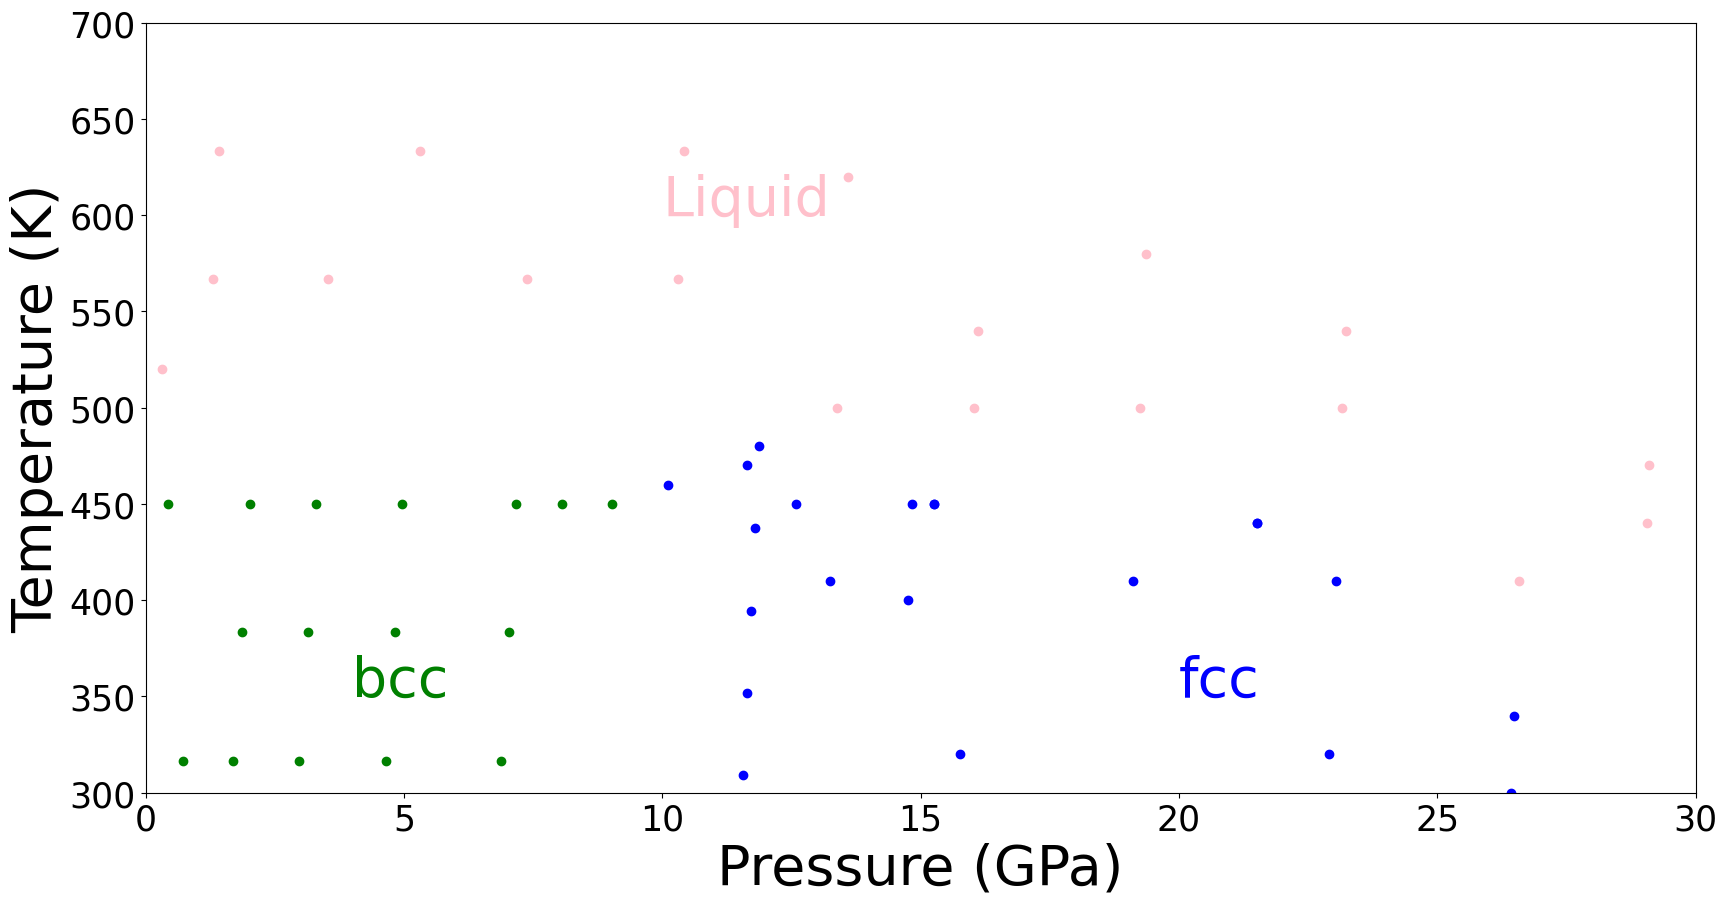

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))


# Training points
plt.scatter(T_P_phase_diag['liq'][:, 0], T_P_phase_diag['liq'][:, 1], color = 'pink')
plt.scatter(T_P_phase_diag['sol_fcc'][:, 0], T_P_phase_diag['sol_fcc'][:, 1], color = 'blue')
plt.scatter(T_P_phase_diag['sol_bcc'][:, 0], T_P_phase_diag['sol_bcc'][:, 1], color = 'green')


plt.xlim(0, 30)
plt.ylim(300, 700)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

plt.text(10, 600, 'Liquid', fontsize = 40, color = 'pink')
plt.text(20, 350, 'fcc', fontsize = 40, color = 'blue')
plt.text(4, 350, 'bcc', fontsize = 40, color = 'green')

plt.ylabel("Temperature (K)", fontsize = 40)
plt.xlabel("Pressure (GPa)", fontsize = 40)
plt.show()

In [31]:
a1 = 3.68
v = a1**3/2
GP_Li.predict_P(t = 475.7*consts['k'], v=v, phase='liq')*consts['Pk']

array([-0.97299497,  0.00427622])

In [41]:
a1 = 3.64
v = a1**3/2
GP_Li.predict_P(t = 475.7*consts['k'], v=v, phase='sol_bcc')*consts['Pk']

array([-1.01770423,  0.01738679])

## Fcc - liquid

In [20]:
opt = 'pt'

# Bounds - 1st volume, 2nd volume, temperature
bounds = [[10, 15], [10, 15], [370*k, 530*k]]

# Pressure of interest
P_fcc_liq = np.linspace(triple_p[0], 30, 10)/consts['Pk']

# Phases of interest (2)
phases = ["sol_fcc", "liq"]


y_fcc_liq = np.zeros((len(P_fcc_liq), 3))
y_fcc_liq_var = np.zeros((len(P_fcc_liq), 3))

for i in range(len(P_fcc_liq)):
    y_fcc_liq[i], y_fcc_liq_var[i], V = GP_Li.compute_var(opt, phases, P = P_fcc_liq[i], bounds = bounds)

[-0.04143506 -0.04013138 -0.05041467]
[-0.04143506 -0.04013138 -0.05041467]
[-0.04143506 -0.04013138 -0.05041467]
[-0.04143506 -0.04013138 -0.0504147 ]
[-0.04143506 -0.04013138 -0.05041463]
[-0.04143506 -0.04013138 -0.05041466]
[-0.03423562 -0.01807824  0.44171273]
[-0.03706238 -0.02826024  0.27740186]
[-0.04143506 -0.04013138 -0.0504147 ]
[-0.04143506 -0.04013138 -0.05041463]
[-0.04143506 -0.04013138 -0.05041466]
[-0.03423562 -0.01807824  0.44171273]
[-0.03706238 -0.02826024  0.27740186]
[-0.03910303 -0.03477849  0.10654426]
[-0.03972898 -0.03705288 -0.10807553]
[-0.04050308 -0.03757076 -0.06104661]
[-0.041465   -0.03878705  0.00360196]
[-0.04027457 -0.03631314 -0.01303315]
[-0.03769681 -0.03175269 -0.01230569]
[-0.03323374 -0.02542132  0.11719172]
[-0.03518862 -0.02868284  0.05379713]
[-0.03769682 -0.03175269 -0.01230575]
[-0.03769681 -0.03175269 -0.01230565]
[-0.03769681 -0.03175269 -0.01230569]
[-0.0384893  -0.03163311  0.111399  ]
[-0.03801214 -0.03133829  0.05425253]
[-0.03778729

[ 0.00263024  0.00393392 -0.05041467]
[ 0.00263024  0.00393392 -0.05041467]
[ 0.00263024  0.00393392 -0.05041467]
[ 0.00263025  0.00393392 -0.05041466]
[ 0.00263024  0.00393392 -0.05041467]
[ 0.00263024  0.00393392 -0.05041466]
[ 0.0018083  -0.00014811 -0.01035064]
[0.00104686 0.00015623 0.002517  ]
[ 7.54578595e-04 -1.82759972e-05  2.30835080e-03]
[9.50021090e-05 3.33831603e-05 1.98913766e-03]
[ 1.78016147e-04 -1.73272887e-06  7.50293060e-04]
[ 3.91953243e-05 -1.86832315e-07  2.14496146e-04]
[-3.33632963e-07  1.02733669e-07  2.39602220e-06]
[-2.99507685e-08 -1.05828962e-09 -3.16318979e-07]
[-3.18530681e-08 -2.02432876e-10 -5.22475502e-08]
[5.73352932e-08 5.59343669e-10 9.95093539e-08]
[-2.06260937e-08 -1.80319648e-12 -2.75800912e-08]
[3.88629424e-08 5.04843389e-12 6.47311885e-08]
[9.99519247e-09 8.12577783e-12 2.44641387e-08]
[4.09677955e-09 1.32510392e-11 2.65881089e-08]
[ 1.07921578e-08  7.72220482e-11 -2.07673585e-08]
[ 1.44615732e-08 -7.64023983e-11 -5.71708538e-08]
[ 1.05952528e-

[ 3.65121379e-04  6.90601193e-09 -1.00223140e-03]
[ 9.14696014e-05 -5.02372394e-09 -2.14525324e-04]
[2.96127409e-06 1.03758982e-09 2.66659542e-06]
[ 5.80867610e-07 -4.18670876e-10 -1.37822860e-06]
[-2.61045508e-07  1.31173294e-10  4.35618046e-07]
[5.66265689e-08 5.36365397e-12 6.33198692e-08]
[-2.61910746e-08 -6.14591711e-12 -2.32263985e-08]
[-1.73152138e-08 -9.40914013e-14 -6.35291263e-08]
[-2.30507866e-08  5.40867351e-12  1.04651427e-07]
[-9.72571307e-09 -6.14591711e-12 -5.64502203e-08]
[-2.61910746e-08  9.73693431e-10 -2.32263998e-08]
[-2.61814364e-08  3.67578190e-12 -2.51188860e-08]
[4.90645535e-08 2.34812170e-14 9.30583584e-08]
[-4.68066123e-08  1.08024700e-13 -6.66149949e-08]
[ 1.17809789e-08  5.72902836e-13 -6.39718811e-09]
[ 3.72927617e-08  7.32747196e-15 -5.66253906e-08]
[ 3.92674641e-08 -4.56884530e-13 -9.06512841e-08]
[-4.10732169e-08  5.72902836e-13 -2.18132548e-08]
[ 1.17809789e-08  9.79868992e-10 -6.39718062e-09]
[ 1.17906171e-08  1.03947961e-11 -8.28967583e-09]
[ 2.99372

[-0.00702083  0.00027148 -0.0048873 ]
[-0.00694803  0.00032682 -0.00238874]
[-0.00689169  0.00028668 -0.00100689]
[-0.00686198  0.00028959  0.00102354]
[-0.00687827  0.00030164  0.00175525]
[-0.00686205  0.00028959  0.00102358]
[-0.00686198  0.00028959  0.00102354]
[-0.00686198  0.00028959  0.00102354]
[-0.00686989  0.00029113  0.00072653]
[-0.00687386  0.00028883  0.00111192]
[-0.00686784  0.00029154  0.00071137]
[-0.00686582  0.00029145  0.00079932]
[-0.00686875  0.00029159  0.00066748]
[-0.00687092  0.00029093  0.0007351 ]
[-0.0068678   0.00029192  0.00063366]
[-0.0068657   0.00029209  0.00066904]
[-0.00686877  0.00029184  0.00061597]
[-0.00687081  0.0002915   0.00066674]
[-0.00686776  0.00029186  0.00061609]
[-0.00686677  0.00029189  0.00061491]
[-0.00686466  0.00029188  0.00062543]
[-0.00686046  0.00029204  0.00057471]
[-0.00685252  0.00029054  0.00076645]
[-0.00686472  0.0002916   0.00066182]
[-0.00686055  0.00029204  0.00057467]
[-0.00686046  0.00029204  0.00057471]
[-0.00686046

/Users/temporary/anaconda3/envs/GPPhad/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[ 0.09076085  0.09206453 -0.05041467]
[ 0.09076085  0.09206453 -0.05041467]
[ 0.09076085  0.09206453 -0.05041467]
[ 0.09076086  0.09206453 -0.05041457]
[ 0.09076085  0.09206453 -0.05041475]
[ 0.09076085  0.09206453 -0.05041466]
[ 0.03171338  0.1035726  -3.35623405]
[0.07736215 0.00405541 1.94491158]
[ 0.09076086  0.09206453 -0.05041457]
[ 0.09076085  0.09206453 -0.05041475]
[ 0.09076085  0.09206453 -0.05041466]
[ 0.03171338  0.1035726  -3.35623405]
[0.07736215 0.00405541 1.94491158]
[0.0732757 0.0336125 1.4674125]
[0.0774226  0.07200187 0.46771756]
[0.08390368 0.08388566 0.16381347]
[0.08763118 0.08849398 0.0494811 ]
[0.08428157 0.08555092 0.08046965]
[0.0858725  0.08734877 0.0517872 ]
[0.0858725  0.08734877 0.05178724]
[0.0858725  0.08734877 0.05178713]
[0.0858725  0.08734877 0.0517872 ]
[ 0.08535241  0.08786793 -0.01454642]
[ 0.08420597  0.08694965 -0.01856556]
[ 0.08153063  0.08456084 -0.02038849]
[ 0.07503408  0.07868125 -0.02391476]
[ 0.05710853  0.06299182 -0.02961901]
[0.0031655

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Training points
plt.scatter(T_P_phase_diag['liq'][:, 0], T_P_phase_diag['liq'][:, 1], color = 'pink')
plt.scatter(T_P_phase_diag['sol_fcc'][:, 0], T_P_phase_diag['sol_fcc'][:, 1], color = 'blue')
plt.scatter(T_P_phase_diag['sol_bcc'][:, 0], T_P_phase_diag['sol_bcc'][:, 1], color = 'green')


# Triple point
plt.errorbar(triple_p[0], triple_p[1], xerr = triple_p_var[0],yerr = triple_p_var[1], fmt = 'o', color = 'grey', ms= 10)

mask = np.ones(len(P_fcc_liq), dtype = bool)
mask[[-4]] = False
# Fcc - liquid
plt.plot(P_fcc_liq[mask][:]*consts['Pk'], y_fcc_liq[mask][:]/k, color = 'red')
plt.fill_between(P_fcc_liq[mask]*consts['Pk'], (y_fcc_liq[mask][:, -1] - y_fcc_liq_var[mask][:, -1])/k, (y_fcc_liq[mask][:, -1] + y_fcc_liq_var[mask][:, -1])/k, alpha = 0.4, color = 'red')

plt.xlim(0, 30)
plt.ylim(300, 700)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


plt.text(10, 600, 'Liquid', fontsize = 40, color = 'pink')
plt.text(20, 350, 'fcc', fontsize = 40, color = 'blue')
plt.text(4, 350, 'bcc', fontsize = 40, color = 'green')

plt.ylabel("Temperature (K)", fontsize = 40)
plt.xlabel("Pressure (GPa)", fontsize = 40)
plt.show()

## Bcc - liquid

In [ ]:
opt = 'pt'

# Bounds - 1st volume, 2nd volume, temperature
bounds = [[12, 22], [12, 22], [350*k, 550*k]]

# Pressure of interest
P_bcc_liq = np.linspace(0, triple_p[0], 20)/consts['Pk']

# Phases of interest (2)
phases = ["sol_bcc", "liq"]


y_bcc_liq = np.zeros((len(P_bcc_liq), 3))
y_bcc_liq_var = np.zeros((len(P_bcc_liq), 3))

for i in range(len(P_bcc_liq)):
    y_bcc_liq[i], y_bcc_liq_var[i], V = GP_Li.compute_var(opt, phases, P = P_bcc_liq[i], bounds = bounds)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Training points
plt.scatter(T_P_phase_diag['sol_fcc'][:, 0], T_P_phase_diag['sol_fcc'][:, 1], color = 'blue', label = 'FCC solid points')
plt.scatter(T_P_phase_diag['sol_bcc'][:, 0], T_P_phase_diag['sol_bcc'][:, 1], color = 'green', label = 'BCC solid points')
plt.scatter(T_P_phase_diag['liq'][:, 0], T_P_phase_diag['liq'][:, 1], color = 'pink', label = 'Liquid points')

# Triple point
plt.errorbar(triple_p[0], triple_p[1], xerr = triple_p_var[0],yerr = triple_p_var[1], fmt = 'o', color = 'grey', ms= 10, label = 'Triple point')

mask = np.ones(len(P_fcc_liq), dtype = bool)
mask[[-4]] = False
# Fcc - liquid
plt.plot(P_fcc_liq[mask][:]*consts['Pk'], y_fcc_liq[mask][:]/k, color = 'red')
plt.fill_between(P_fcc_liq[mask]*consts['Pk'], (y_fcc_liq[mask][:, -1] - y_fcc_liq_var[mask][:, -1])/k, (y_fcc_liq[mask][:, -1] + y_fcc_liq_var[mask][:, -1])/k, alpha = 0.4, color = 'red')


# Bcc - liquid
plt.plot(P_bcc_liq*consts['Pk'], y_bcc_liq[:, -1]/k, color = 'red')
plt.fill_between(P_bcc_liq*consts['Pk'], (y_bcc_liq[:, -1] - y_bcc_liq_var[:, -1])/k, (y_bcc_liq[:, -1] + y_bcc_liq_var[:, -1])/k, alpha = 0.4, color = 'red')


plt.xlim(0, 30)
plt.ylim(300, 700)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


plt.text(10, 600, 'Liquid', fontsize = 40, color = 'pink')
plt.text(20, 350, 'fcc', fontsize = 40, color = 'blue')
plt.text(4, 350, 'bcc', fontsize = 40, color = 'green')
plt.ylabel("Temperature (K)", fontsize = 40)
plt.xlabel("Pressure (GPa)", fontsize = 40)

plt.legend(fontsize=25)

In [23]:
opt = 'pt'

# Bounds - 1st volume, 2nd volume, temperature
bounds = [[12, 22], [12, 22], [350*k, 550*k]]

# Pressure of interest
P = mpfr(0/consts['Pk'])

# Phases of interest (2)
phases = ["sol_bcc", "liq"]

y_pt, y_pt_var, V = GP_Li.compute_var(opt, phases, P = P, bounds = bounds)

[-0.02527492 -0.02539224 -0.11250923]
[-0.02527492 -0.02539224 -0.11250923]
[-0.02527492 -0.02539224 -0.11250923]
[-0.02527492 -0.02539224 -0.11250928]
[-0.02527492 -0.02539224 -0.11250918]
[-0.02527492 -0.02539224 -0.11250923]
[-0.01054197 -0.01071733 -0.05861915]
[-0.00637636 -0.00664741 -0.03940938]
[-0.00322232 -0.00363205 -0.03243169]
[-0.00153469 -0.00204145 -0.04077656]
[-0.00168062 -0.00217402 -0.03275948]
[-0.00322232 -0.00363205 -0.03243169]
[-0.00322232 -0.00363205 -0.03243169]
[-0.00322232 -0.00363205 -0.03243169]
[-0.00256965 -0.00293655 -0.0052347 ]
[-0.00152326 -0.00187377 -0.00068898]
[-0.00059045 -0.00096879 -0.00819178]
[-0.00090453 -0.00122586 -0.00274762]
[-0.00152326 -0.00187377 -0.00068898]
[-0.00152326 -0.00187377 -0.00068898]
[-0.00152326 -0.00187377 -0.00068898]
[-0.00120692 -0.0015043  -0.0006538 ]
[-0.00073578 -0.00100027 -0.00235964]
[-9.78582842e-04 -1.22478902e-03  3.93235884e-05]
[-0.00060556 -0.0008288  -0.00157479]
[-7.95993757e-04 -1.00407471e-03 -7.61

In [38]:
y_pt

array([21.654433468937633, 21.956093533177093, 0.04099273447689657],
      dtype=object)

In [37]:
# Solid entropy
t = y_pt[2]
#t = 1200*consts['k']
v = y_pt[0]
phase = 'sol_bcc'

X_S_sol = [(t, [phase, 'd_1_0', t, v] + x_fixed),
           (1.0, [phase, 'd_0_0', t, v] + x_fixed)]

S_sol = -(t*GP_Li.d_func(t, v, phase = phase, d = "d_1_0") + GP_Li.d_func(t, v, phase = phase, d = "d_0_0"))
dS_sol = GP_Li.predict([X_S_sol])[0, 1]**(1/2.0)

round(S_sol, 4), round(float(dS_sol), 4)

(-0.2057, 0.0582)

In [36]:
t/consts['k']

(y_pt[0]*2)**(1/3.), (y_pt[1]*2)**(1/3.)

(3.5117663027789847, 3.5279982087560455)

In [27]:
# Liquid entropy
t = y_pt[2]
#t = 1200*consts['k']
v = y_pt[1]
phase = 'liq'

X_S_sol = [(t, [phase, 'd_1_0', t, v] + x_fixed),
           (1.0, [phase, 'd_0_0', t, v] + x_fixed)]

S_liq = -(t*GP_Li.d_func(t, v, phase = phase, d = "d_1_0") + GP_Li.d_func(t, v, phase = phase, d = "d_0_0"))
dS_liq = GP_Li.predict([X_S_sol])[0, 1]**(1/2.0)

round(S_liq, 4), round(float(dS_liq), 4)

(0.6101, 0.0597)

In [28]:
# Difference
phase1 = 'liq'
phase2 = 'sol_bcc'
t = y_pt[2]
v1 = y_pt[1]
v2 = y_pt[0]

#t = 1200*consts['k']

X_S_diff = [(t, [phase1, 'd_1_0', t, v1] + x_fixed),
          (1.0, [phase1, 'd_0_0', t, v1] + x_fixed),
          (-t, [phase2, 'd_1_0', t, v2] + x_fixed),
          (-1.0, [phase2, 'd_0_0', t, v2] + x_fixed)]

dS_diff = GP_Li.predict([X_S_diff])[0, 1]**(1/2.0)
S_diff = S_liq - S_sol

round(S_diff, 4), round(float(dS_diff), 4)

(0.8159, 0.0139)

## Fcc - Bcc

In [32]:
opt = 'tp'

# Bounds - first volume, seconde volume
bounds = [[13, 16], [13, 16]]

# Temperature of interest
T_fcc_bcc = np.linspace(270, triple_p[1], 20)*k

# Phases that coexist (2)
phases = ["sol_fcc", "sol_bcc"]

y_fcc_bcc = np.zeros((len(T_fcc_bcc), 3))
y_fcc_bcc_var = np.zeros((len(T_fcc_bcc), 3))

for i in range(len(T_fcc_bcc)):
    y_fcc_bcc[i], y_fcc_bcc_var[i], V = GP_Li.compute_var(opt, phases, T = T_fcc_bcc[i], bounds = bounds)

[ 0.12243482 -0.04166601]
[ 0.12243482 -0.04166601]
[ 0.12243482 -0.04166601]
[ 0.12243484 -0.04166602]
[ 0.1224348  -0.04166601]
[-0.00490719  0.01050954]
[-0.0029305  -0.00274352]
[-0.00174756  0.00072338]
[-0.00075258  0.00037874]
[ 0.00022327 -0.00010675]
[ 3.08605427e-06 -2.07348685e-06]
[-7.32521754e-07  3.32712061e-07]
[-2.43800740e-08  5.60745703e-08]
[-3.47730307e-08 -4.21370082e-08]
[7.57689778e-09 1.06459449e-08]
[-7.05381016e-08 -2.27096578e-08]
[-8.03817368e-09  8.98256025e-10]
[4.67206052e-09 3.98843913e-09]
[4.17509090e-08 9.86218529e-09]
[-2.50089611e-08 -2.81354195e-09]
[3.77008003e-08 1.00915727e-08]
[-8.90153062e-09  3.98845518e-09]
[-2.03314259e-08 -4.30100788e-10]
[6.26668646e-08 6.72653466e-09]
[-5.36766720e-08 -1.62318563e-08]
[ 0.112422   -0.03652179]
[ 0.112422   -0.03652179]
[ 0.112422   -0.03652179]
[ 0.11242202 -0.0365218 ]
[ 0.11242199 -0.03652179]
[-0.00623761  0.01183156]
[-0.00333017 -0.00301719]
[-0.00213099  0.00083819]
[-0.00088291  0.00044701]
[ 0.00

[ 0.05778401 -0.0118531 ]
[ 0.05778401 -0.0118531 ]
[ 0.05778401 -0.0118531 ]
[ 0.05778402 -0.0118531 ]
[ 0.057784   -0.01185309]
[-0.00688269  0.02259812]
[-0.00116541 -0.00462815]
[-0.00465168  0.00022748]
[-0.00136059  0.00081944]
[-0.00094601  0.00053332]
[-1.50229339e-05  2.20580156e-05]
[ 6.87531463e-06 -3.39124267e-06]
[ 9.08365452e-07 -4.88645165e-07]
[-5.83505413e-08  8.87236837e-09]
[1.40418726e-08 8.17517828e-09]
[-1.37934109e-09  1.71067811e-08]
[-2.47638672e-08 -3.03970721e-09]
[2.10733653e-08 6.74535100e-09]
[4.32779901e-09 8.17517709e-09]
[-1.78717738e-08  1.01855836e-08]
[4.7439463e-08 1.1233456e-08]
[ 0.05524293 -0.0105936 ]
[ 0.05524293 -0.0105936 ]
[ 0.05524293 -0.0105936 ]
[ 0.05524294 -0.0105936 ]
[ 0.05524292 -0.0105936 ]
[-0.00745735  0.02099366]
[-0.00017882 -0.00450455]
[-4.37260121e-03  9.53677219e-05]
[-0.00124723  0.00079575]
[-0.00083268  0.0004836 ]
[-2.85395628e-05  2.87853831e-05]
[ 7.21495834e-06 -3.57420006e-06]
[ 8.19046402e-07 -4.84028636e-07]
[1.670

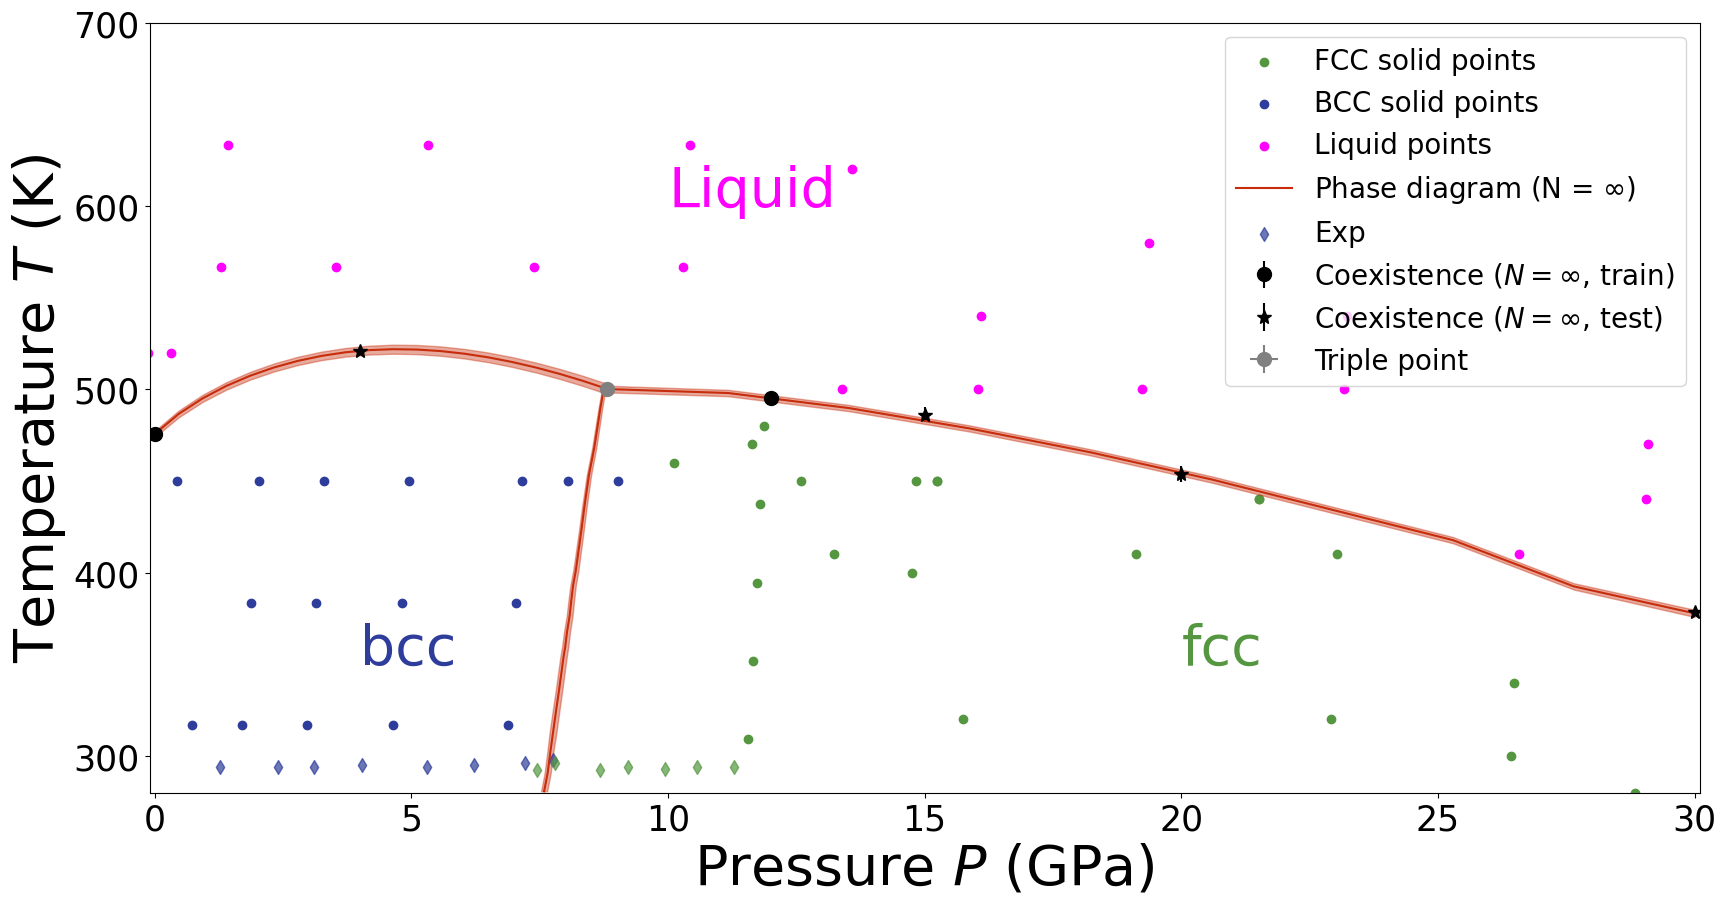

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

colors = ['#C72C0B', '#2E3D9B', '#559740', 'magenta', 'cyan', 'orange', 'gray']
Press_train = [0, 12]
coex_train = [475.5, 495.4]
coex_train_err = [1, 1.3]
Press_test = [4, 15, 20, 30]
coex_test = [521, 486.3, 453.8, 378.8]
coex_test_err = [2, 4, 4.5, 2]

melt_bcc_fcc = np.genfromtxt('melt_fcc_bcc.txt')
T_fcc_bcc = melt_bcc_fcc[:, 1]*consts['k']
y_fcc_bcc = melt_bcc_fcc[:, 0]/consts['Pk']
y_fcc_bcc_var = melt_bcc_fcc[:, 2]/consts['Pk']

Exp_fcc = np.genfromtxt('Exp_fcc.txt', delimiter=', ')
Exp_bcc = np.genfromtxt('Exp_bcc.txt', delimiter=', ')
# Training points
plt.scatter(T_P_phase_diag['sol_fcc'][:, 0], T_P_phase_diag['sol_fcc'][:, 1], color = colors[2], label = 'FCC solid points')
plt.scatter(T_P_phase_diag['sol_bcc'][:, 0], T_P_phase_diag['sol_bcc'][:, 1], color = colors[1], label = 'BCC solid points')
plt.scatter(T_P_phase_diag['liq'][:, 0], T_P_phase_diag['liq'][:, 1], color = colors[3], label = 'Liquid points')

plt.errorbar(Press_train, coex_train, yerr=coex_train_err, fmt='o', label='Coexistence ($N=\infty$, train)', color = 'k', ms = 10)
plt.errorbar(Press_test, coex_test, yerr=coex_test_err, fmt='*', label='Coexistence ($N=\infty$, test)', color = 'k', ms = 10)

mask = np.ones(len(P_fcc_liq), dtype = bool)
mask[[-4]] = False
# Fcc - liquid
plt.plot(P_fcc_liq[mask][:]*consts['Pk'], y_fcc_liq[mask][:]/k, color = colors[0])
plt.fill_between(P_fcc_liq[mask]*consts['Pk'], (y_fcc_liq[mask][:, -1] - y_fcc_liq_var[mask][:, -1])/k, (y_fcc_liq[mask][:, -1] + y_fcc_liq_var[mask][:, -1])/k, alpha = 0.4, color = colors[0])


# Bcc - liquid
plt.plot(P_bcc_liq*consts['Pk'], y_bcc_liq[:, -1]/k, color = colors[0])
plt.fill_between(P_bcc_liq*consts['Pk'], (y_bcc_liq[:, -1] - y_bcc_liq_var[:, -1])/k, (y_bcc_liq[:, -1] + y_bcc_liq_var[:, -1])/k, alpha = 0.4, color = colors[0])

# Fcc - Bcc
plt.plot(y_fcc_bcc*consts['Pk'], T_fcc_bcc/k, color = colors[0], label = 'Phase diagram (N = $\infty$)')
plt.fill_betweenx(T_fcc_bcc/k, (y_fcc_bcc - y_fcc_bcc_var[:])*consts['Pk'], (y_fcc_bcc + y_fcc_bcc_var[:])*consts['Pk'], alpha = 0.4, color = colors[0])
#plt.plot(y_fcc_bcc*consts['Pk'], T_fcc_bcc/k, color = colors[0], label = 'Phase diagram (N = $\infty$)')
#plt.fill_betweenx(T_fcc_bcc/k, (y_fcc_bcc - y_fcc_bcc_var[:])*consts['Pk'], (y_fcc_bcc + y_fcc_bcc_var[:])*consts['Pk'], alpha = 0.4, color = colors[0])
#plt.plot(y_fcc_bcc[:, -1]*consts['Pk'], T_fcc_bcc/k, color = colors[0], label = 'Phase diagram (N = $\infty$)')
#plt.fill_betweenx(T_fcc_bcc/k, (y_fcc_bcc[:, -1] - y_fcc_bcc_var[:, -1])*consts['Pk'], (y_fcc_bcc[:, -1] + y_fcc_bcc_var[:, -1])*consts['Pk'], alpha = 0.4, color = colors[0])


# Triple point
plt.errorbar(triple_p[0], triple_p[1], xerr = triple_p_var[0],yerr = triple_p_var[1], fmt = 'o', color = 'grey', ms= 10, label = 'Triple point')
plt.xlim(-0.1, 30.1)
plt.ylim(280, 700)

plt.scatter(Exp_fcc[:, 0], Exp_fcc[:, 1], label = 'Exp', marker='d', color = colors[1], s = 50, alpha = 0.7)
plt.scatter(Exp_bcc[:, 0], Exp_bcc[:, 1], marker='d', color = colors[2], s = 50, alpha = 0.7)

plt.yticks([300, 400, 500, 600, 700], fontsize = 25)
plt.xticks(fontsize = 25)


plt.text(10, 600, 'Liquid', fontsize = 40, color = colors[3])
plt.text(20, 350, 'fcc', fontsize = 40, color = colors[2])
plt.text(4, 350, 'bcc', fontsize = 40, color = colors[1])
plt.ylabel("Temperature $T$ (K)", fontsize = 40)
plt.xlabel("Pressure $P$ (GPa)", fontsize = 40)

plt.legend(fontsize=20)

plt.savefig('Phase_diagram.pdf', format = 'pdf')